In [1]:
import tensorflow as tf


In [2]:
tf.__version__

'2.19.0'

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
df = load_breast_cancer()

In [5]:
type(df)

sklearn.utils._bunch.Bunch

In [6]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
df.data.shape

(569, 30)

In [8]:
df.target.shape

(569,)

In [9]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.33, random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(381, 30)
(188, 30)
(381,)
(188,)


In [13]:
features = df.feature_names.tolist()

features

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc =StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
print(X_train)

[[ 0.35581987 -1.72664707  0.41303118 ...  1.05652305  0.51844283
   0.98925483]
 [-0.37326674  0.50881308 -0.39469992 ... -0.89667412 -0.63236707
  -0.11469617]
 [ 1.4033581  -0.15144941  1.34799923 ...  1.46353548  1.02587412
  -0.03369823]
 ...
 [ 0.02898794 -0.56411347 -0.0829084  ... -1.2463348  -0.67979055
  -1.26509354]
 [-0.05760855  0.09614902 -0.04957475 ...  1.05652305  0.45995387
   1.24414347]
 [-0.5604269   0.30837625 -0.61462066 ... -0.6145405  -0.30672581
  -0.8357478 ]]


Create nueral network

In [17]:
model1 = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=[30,],name='input_layer'),
        tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer')

    ])

In [18]:
# dir(model)
# model.weights

In [19]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Input(shape=[30,],name='input_layer'))
# model.add(tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer'))


In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[30,],name='input_layer'))
model.add(tf.keras.layers.Dense(32,activation='relu',name='hidden_layer_1'))
model.add(tf.keras.layers.Dense(64,activation='relu',name='hidden_layer_2'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer'))


In [21]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,169 (12.38 KB)

 Trainable params: 3,169 (12.38 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
r =model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5077 - loss: 0.7090 - val_accuracy: 0.9255 - val_loss: 0.4976
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9474 - loss: 0.4495 - val_accuracy: 0.9628 - val_loss: 0.3336
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9492 - loss: 0.3112 - val_accuracy: 0.9628 - val_loss: 0.2291
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9556 - loss: 0.2102 - val_accuracy: 0.9628 - val_loss: 0.1659
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9556 - loss: 0.1647 - val_accuracy: 0.9734 - val_loss: 0.1297
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9698 - loss: 0.1278 - val_accuracy: 0.9734 - val_loss: 0.1084
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9713 - loss: 0.1130 - val_accuracy: 0.9734 - val_loss: 0.0958
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9809 - loss: 0.0873 - val_accuracy: 0.9734 - val_l

In [25]:
model.get_weights()

[array([[-1.09320901e-01, -1.86919086e-02,  3.13832462e-01,
          1.96749084e-02,  4.00458202e-02, -2.71320432e-01,
          7.73996860e-02,  1.80288121e-01,  2.27436751e-01,
          1.91696361e-01,  2.83432007e-01, -8.15960616e-02,
         -1.03328496e-01,  2.28433823e-03, -1.49298698e-01,
         -9.84514803e-02, -1.35849670e-01, -1.25930935e-01,
         -1.09734923e-01, -1.72813222e-01,  3.26474383e-02,
         -2.35377438e-02, -1.08882837e-01, -2.32804507e-01,
          2.28654251e-01,  1.57053769e-01, -2.08604604e-01,
          4.94525246e-02, -6.52072057e-02,  3.60053182e-01,
         -3.60580474e-01, -8.60677809e-02],
        [-2.93449998e-01,  2.47774050e-01,  2.35698044e-01,
         -2.64500380e-01,  5.56095690e-02, -1.37634337e-01,
         -1.81450099e-01,  3.05233568e-01,  1.28412709e-01,
          1.17074490e-01,  1.44136578e-01, -3.90608639e-01,
          2.16520458e-01, -3.02049611e-03, -2.62286752e-01,
          1.81718171e-02,  1.03867576e-01,  6.01594485e-

In [26]:
weights = model.get_weights()[0]
bias = model.get_weights()[1]
print(f'weights: {weights}')
print(f'bias: {bias}')

weights: [[-1.09320901e-01 -1.86919086e-02  3.13832462e-01  1.96749084e-02
   4.00458202e-02 -2.71320432e-01  7.73996860e-02  1.80288121e-01
   2.27436751e-01  1.91696361e-01  2.83432007e-01 -8.15960616e-02
  -1.03328496e-01  2.28433823e-03 -1.49298698e-01 -9.84514803e-02
  -1.35849670e-01 -1.25930935e-01 -1.09734923e-01 -1.72813222e-01
   3.26474383e-02 -2.35377438e-02 -1.08882837e-01 -2.32804507e-01
   2.28654251e-01  1.57053769e-01 -2.08604604e-01  4.94525246e-02
  -6.52072057e-02  3.60053182e-01 -3.60580474e-01 -8.60677809e-02]
 [-2.93449998e-01  2.47774050e-01  2.35698044e-01 -2.64500380e-01
   5.56095690e-02 -1.37634337e-01 -1.81450099e-01  3.05233568e-01
   1.28412709e-01  1.17074490e-01  1.44136578e-01 -3.90608639e-01
   2.16520458e-01 -3.02049611e-03 -2.62286752e-01  1.81718171e-02
   1.03867576e-01  6.01594485e-02 -3.46700242e-03 -1.80506408e-01
   1.46259427e-01  2.79105186e-01 -1.77274361e-01  2.07672849e-01
   1.90410405e-01 -1.52995169e-01 -3.12093407e-01 -2.62584925e-01


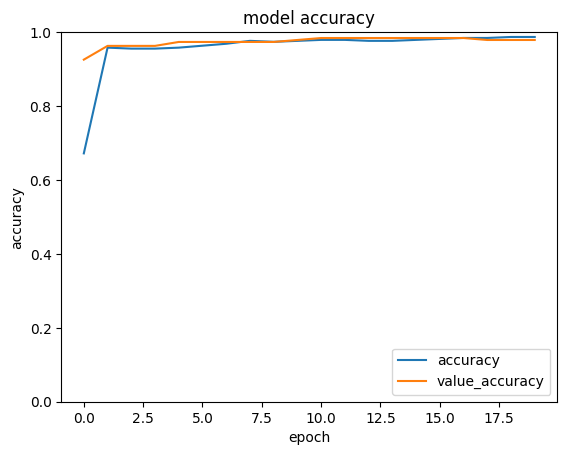

In [27]:
import matplotlib.pyplot as plt

plt.plot(r.history['accuracy'],label ='accuracy')
plt.plot(r.history['val_accuracy'],label = 'value_accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()


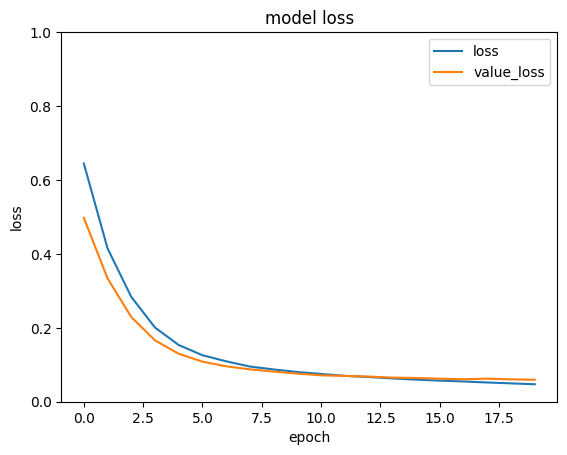

In [28]:
# plot loss and validation loss

plt.plot(r.history['loss'],label ='loss')
plt.plot(r.history['val_loss'],label = 'value_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0,1])
plt.legend(loc='upper right')
plt.show()

In [29]:
#make prediction

y_pred = model.predict(X_test)

print("Predictions",y_pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predictions [[9.30946410e-01]
 [3.59757687e-04]
 [2.28162017e-03]
 [9.97811317e-01]
 [9.99541581e-01]
 [6.49770460e-10]
 [3.40839961e-07]
 [1.05914555e-01]
 [3.11775416e-01]
 [9.97328281e-01]
 [9.30695891e-01]
 [3.48655172e-02]
 [9.87357736e-01]
 [7.89510012e-02]
 [9.98491585e-01]
 [9.73635237e-04]
 [9.95224893e-01]
 [9.99931633e-01]
 [9.99998093e-01]
 [1.04866604e-05]
 [9.11342204e-01]
 [9.90505099e-01]
 [6.13662792e-08]
 [9.99566734e-01]
 [9.97067273e-01]
 [9.99759436e-01]
 [9.98097003e-01]
 [9.91677582e-01]
 [9.89025414e-01]
 [2.01265029e-05]
 [9.97495651e-01]
 [9.99588370e-01]
 [9.99565661e-01]
 [9.87141967e-01]
 [9.99709487e-01]
 [9.98735368e-01]
 [6.38074204e-02]
 [9.98664737e-01]
 [2.58200307e-04]
 [8.90835762e-01]
 [9.99644399e-01]
 [2.81702075e-03]
 [9.98129368e-01]
 [9.96522069e-01]
 [9.93134856e-01]
 [9.79231954e-01]
 [9.99974728e-01]
 [9.98959661e-01]
 [9.52211201e-01]
 [9.97791588e-01]
 [1.86731399e-04]
 [1.32800187e-06]
 [5.79303324e-

In [30]:
2.0847279e-01

0.20847279

In [31]:
9.2370188e-01

0.92370188

In [32]:
import numpy as np
y_pred = np.round(y_pred)
y_pred = y_pred.flatten()

print('Rounded predictions',y_pred)

Rounded predictions [1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.]


In [33]:
print("Mannual accuacy calculation",np.mean(y_pred == y_test))
print('Evaluate method accuracy',model.evaluate(X_test,y_test)[1])

Mannual accuacy calculation 0.9787234042553191
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9700 - loss: 0.0711 
Evaluate method accuracy 0.978723406791687


In [34]:
model.save('linear_classification_model.keras')
print('model saved')

model saved


In [35]:
#save the scaler
import pickle
pickle.dump(sc,open('scaler.pkl','wb'))
print('scaler saved')

scaler saved


In [36]:


model2 = tf.keras.models.load_model('linear_classification_model.keras')
print('model loaded')
print('Model summart after loading',model2.summary())
print(model2.layers)
print(model2.evaluate(X_test,y_test)[1])




model loaded


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,509 (37.15 KB)

 Trainable params: 3,169 (12.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,340 (24.77 KB)

Model summart after loading None
[<Dense name=hidden_layer_1, built=True>, <Dense name=hidden_layer_2, built=True>, <Dense name=output_layer, built=True>]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9700 - loss: 0.0711  
0.978723406791687


In [37]:
import tensorflow as tf
import pickle
import numpy as np

# 1. Load the saved components
model = tf.keras.models.load_model('linear_classification_model.keras')
scaler = pickle.load(open('scaler.pkl', 'rb'))

# 2. Define a new input (example: 30 features matching df.feature_names)
# In a real scenario, this would come from a user form or an API
sample_data = np.array([17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471,
                        0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399,
                        0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33,
                        184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189])

# 3. Reshape the data for a single prediction (1 sample, 30 features)
sample_data = sample_data.reshape(1, -1)

# 4. SCALE THE DATA (Crucial Step)
sample_data_scaled = scaler.transform(sample_data)

# 5. Make the prediction

# 1. Ensure data is a 2D array and scaled
# sample_data_scaled = sc.transform(sample_data.reshape(1, -1))

# 2. Run prediction (using model() to avoid the re-tracing warning)
prediction_tensor = model(sample_data_scaled, training=False)
prob = prediction_tensor.numpy()[0][0]

# 3. Final Logic
if prob >= 0.5:
    result = "Benign"
    confidence = prob * 100
else:
    result = "Malignant"
    confidence = (1 - prob) * 100 # Invert for Malignant confidence

print(f"Result: {result}")
print(f"Confidence: {confidence:.2f}%")

Result: Malignant
Confidence: 100.00%


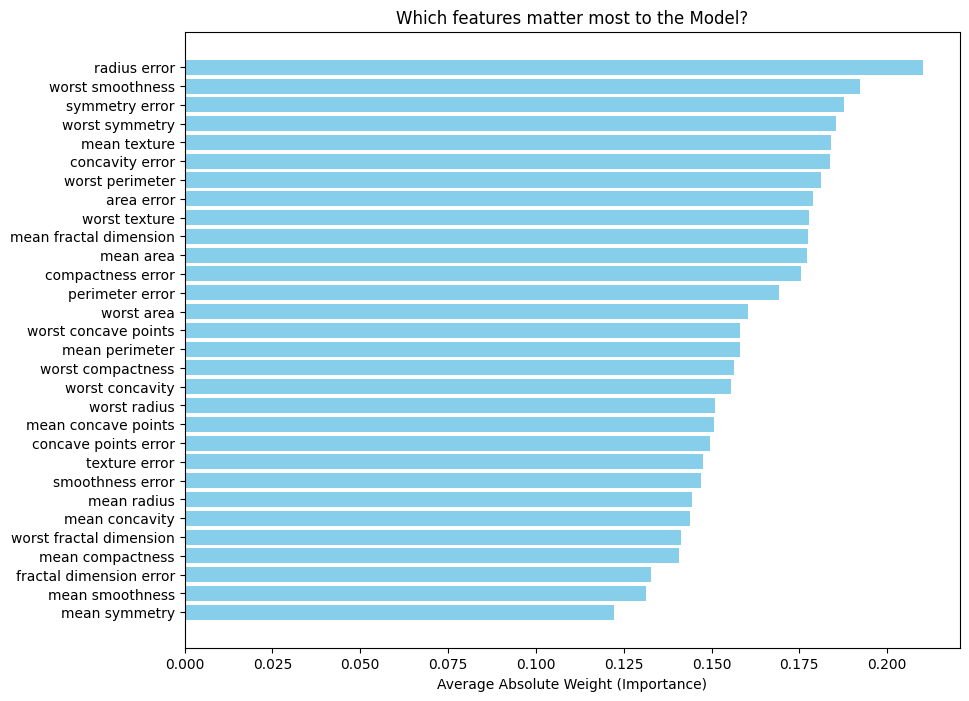

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Get weights from the first hidden layer
# model.layers[0] is your 'hidden_layer_1'
weights, biases = model.layers[0].get_weights()

# 2. Calculate the 'importance'
# We take the mean absolute weight across all 32 neurons in the first layer
feature_importance = np.mean(np.abs(weights), axis=1)

# 3. Pair them with the feature names
importance_df = pd.DataFrame({
    'Feature': df.feature_names,
    'Importance': feature_importance
})

# 4. Sort and Plot
importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Average Absolute Weight (Importance)')
plt.title('Which features matter most to the Model?')
plt.show()

Image processing

In [39]:
SEED = 12345

import os,random
os.environ["PYTHONHASHSEED"] = str(SEED)

#force CPU
os.environ["CUDA_VISIBLE_DEVICES"] ="-1"

random.seed(SEED)
import numpy as np
np.random.seed(SEED)

In [40]:
import tensorflow as tf

In [41]:
tf.__version__

'2.19.0'

In [42]:
mnist = tf.keras.datasets.mnist


In [43]:
print(mnist)

<module 'keras.datasets.mnist' from '/usr/local/lib/python3.12/dist-packages/keras/datasets/mnist/__init__.py'>


In [44]:
type(mnist)

module

In [45]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [46]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [47]:
x_train[0].shape

(28, 28)

In [48]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [49]:
y_train[0]

np.uint8(5)

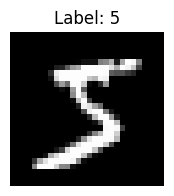

In [50]:
#plot the 0th image of x_train
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.gca().axis('off')
plt.show()



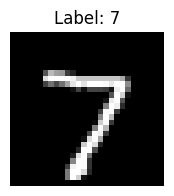

In [51]:
#plot the 0th image of x_train
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Label: {y_test[0]}")
plt.gca().axis('off')
plt.show()



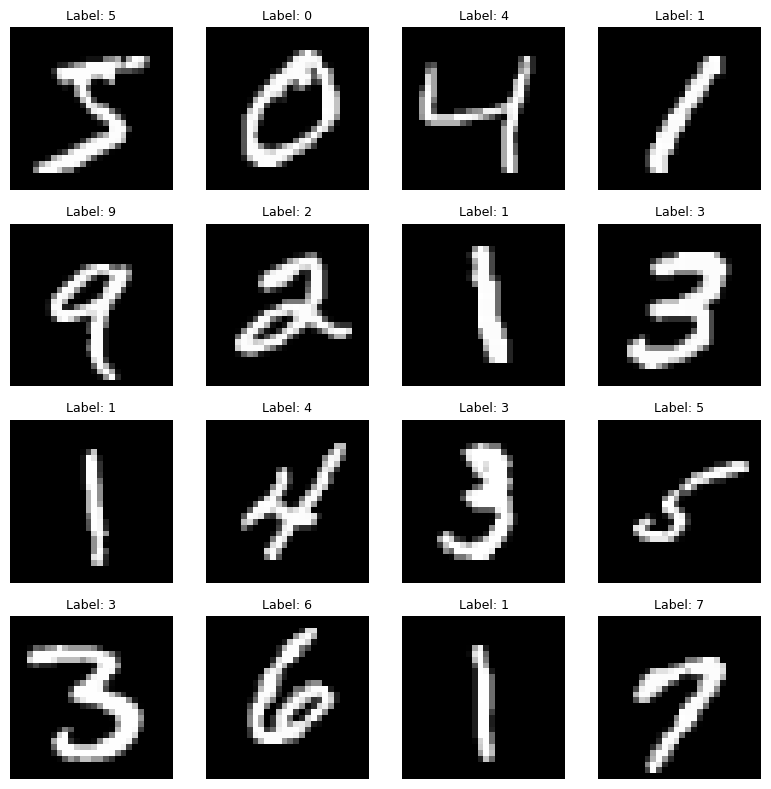

In [52]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')  # remove cmap if RGB
    ax.set_title(f"Label: {y_train[i]}", fontsize=9)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [53]:
#nomarlization

x_train = x_train / 255.0
x_test =  x_test / 255.0

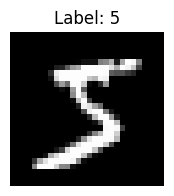

In [54]:
#plot the 0th image of x_train
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.gca().axis('off')
plt.show()



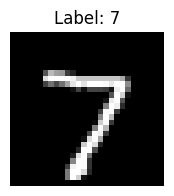

In [55]:
#plot the 0th image of x_train
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Label: {y_test[0]}")
plt.gca().axis('off')
plt.show()



In [56]:
print(x_train.shape)

print(x_train.reshape(60000,28*28).shape)

(60000, 28, 28)
(60000, 784)


In [57]:
y_train.shape


(60000,)

In [58]:
#build instantiate the ANN model with decision tree classifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import  accuracy_score,classification_report,confusion_matrix




In [59]:
dc = DecisionTreeClassifier(max_depth=10,random_state=42)

In [60]:
dc.fit(x_train.reshape(60000,28*28),y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [61]:
y_pred_train = dc.predict(x_train.reshape(60000,28*28))

In [62]:
y_pred_test = dc.predict(x_test.reshape(10000,28*28))

In [63]:
#accuracy score for train and test

print("Train accuracy",accuracy_score(y_train,y_pred_train))
print("Test accuracy", accuracy_score(y_test,y_pred_test))

Train accuracy 0.8995166666666666
Test accuracy 0.8663


In [64]:
#build instantiate the ANN model with SVM
from sklearn.svm import  SVC
from sklearn.metrics import accuracy_score

sv = SVC(kernel="linear",random_state=42)

sv.fit(x_train.reshape(60000,28*28),y_train)

y_pred_train = sv.predict(x_train.reshape(60000,28*28))
y_pred_test = sv.predict(x_test.reshape(10000,28*28))

print("Train accuracy",accuracy_score(y_train,y_pred_train))
print("Test accuracy", accuracy_score(y_test,y_pred_test))

Train accuracy 0.97075
Test accuracy 0.9404


In [86]:
SEED = 12345

import os,random
os.environ["PYTHONHASHSEED"] = str(SEED)

#force CPU
os.environ["CUDA_VISIBLE_DEVICES"] ="-1"

random.seed(SEED)
import numpy as np
np.random.seed(SEED)

#default weight initializer  glorot uniform

model initialization

In [115]:
#build instantiate the DL model

from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense,Flatten,Dropout

from tensorflow.keras.initializers import lecun_normal

In [89]:
initializer = lecun_normal()

In [118]:
model5 =Sequential()
model5.add(Input(shape=(28,28,1)))
model5.add(Flatten())
model5.add(Dropout(rate=0.2))
model5.add(Dense(128,activation='relu', kernel_initializer=initializer))
model5.add(Dropout(rate=0.4))
model5.add(Dense(64,activation='relu',kernel_initializer=initializer))
model5.add(Dropout(rate=0.2))
model5.add(Dense(10,activation='softmax',kernel_initializer=initializer))


In [119]:
model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:
#compile the model


model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [121]:
#train the model
r = model5.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

# r = model5.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15,batch_size=64)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7770 - loss: 0.7072 - val_accuracy: 0.9520 - val_loss: 0.1586
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9218 - loss: 0.2596 - val_accuracy: 0.9647 - val_loss: 0.1148
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9340 - loss: 0.2178 - val_accuracy: 0.9670 - val_loss: 0.1036
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9398 - loss: 0.1970 - val_accuracy: 0.9706 - val_loss: 0.0927
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9459 - loss: 0.1781 - val_accuracy: 0.9736 - val_loss: 0.0884
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9496 - loss: 0.1629 - val_accuracy: 0.9739 - val_loss: 0.0855
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9514 - loss: 0.1572 - val_accuracy: 0.9773 - val_loss: 0.0789
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9520 - loss: 0.15

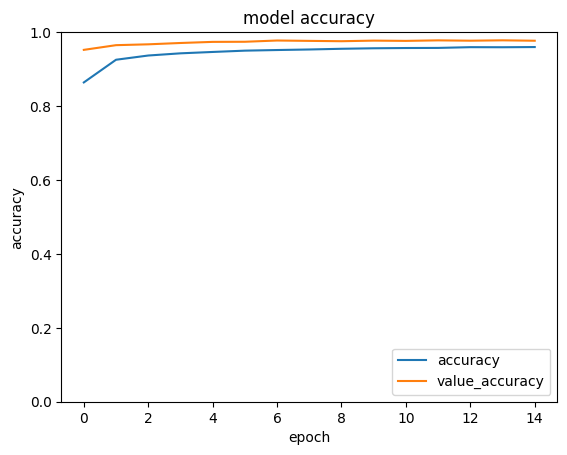

In [122]:
import matplotlib.pyplot as plt

plt.plot(r.history['accuracy'],label ='accuracy')
plt.plot(r.history['val_accuracy'],label = 'value_accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()


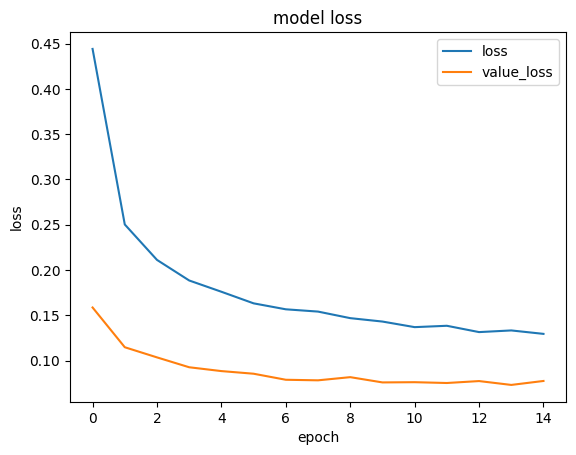

In [123]:
# plot loss and validation loss

plt.plot(r.history['loss'],label ='loss')
plt.plot(r.history['val_loss'],label = 'value_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.ylim([0,1])
plt.legend(loc='upper right')
plt.show()

In [124]:
print('Evaluate model on training data:')
loss, accuracy = model5.evaluate(x_train, y_train, verbose=0)
print(f'Training Loss: {loss:.4f}')
print(f'Training Accuracy: {accuracy:.4f}')

print('\nEvaluate model on testing data:')
loss, accuracy = model5.evaluate(x_test, y_test, verbose=0)
print(f'Testing Loss: {loss:.4f}')
print(f'Testing Accuracy: {accuracy:.4f}')

Evaluate model on training data:
Training Loss: 0.0447
Training Accuracy: 0.9867

Evaluate model on testing data:
Testing Loss: 0.0775
Testing Accuracy: 0.9767


In [125]:
#predict on a x_test

y_pred = model5.predict(x_test)

y_pred.shape


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 10)

In [126]:
print(y_pred[0])

[7.5959578e-13 1.4048331e-08 1.1151795e-07 3.3367083e-05 7.6441128e-12
 6.3040255e-07 2.1877389e-18 9.9996442e-01 6.3847612e-09 1.3735158e-06]


In [99]:
import numpy as np

In [127]:
print(np.sum(y_pred[90]))

1.0


In [128]:
y_pred = np.argmax(y_pred,axis=1)

In [129]:
y_pred[0]

np.int64(7)

In [130]:
y_pred.shape

(10000,)

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt


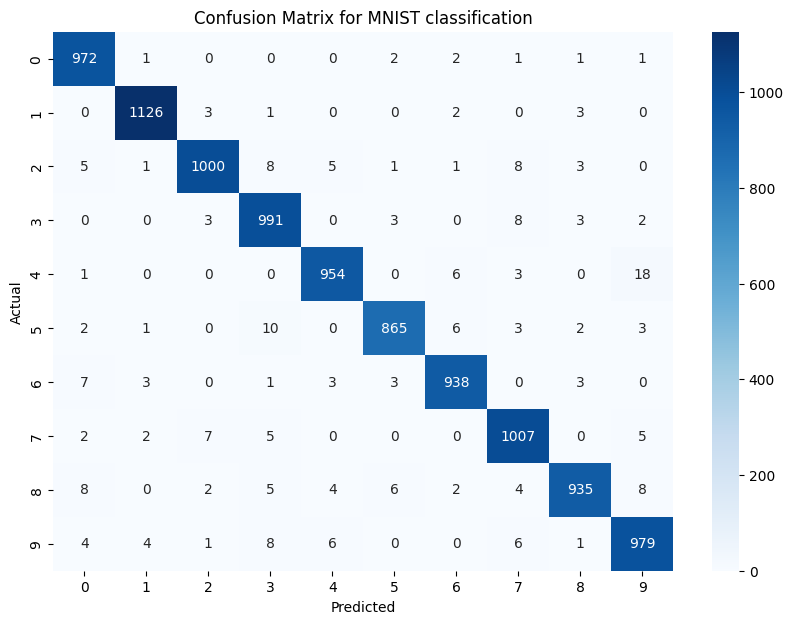

In [132]:
plt.figure(figsize=(10,7))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for MNIST classification')
plt.show()

In [133]:
np.where(y_test != y_pred)[0]

array([   8,  115,  149,  247,  259,  321,  340,  381,  445,  495,  582,
        610,  619,  674,  684,  691,  717,  720,  740,  760,  839,  844,
        882,  924,  947,  956,  965, 1014, 1062, 1107, 1112, 1156, 1181,
       1182, 1226, 1232, 1242, 1247, 1260, 1299, 1319, 1328, 1393, 1414,
       1494, 1500, 1522, 1530, 1549, 1553, 1609, 1671, 1681, 1717, 1722,
       1737, 1754, 1790, 1828, 1878, 1901, 1955, 2004, 2044, 2053, 2098,
       2109, 2118, 2125, 2129, 2130, 2135, 2182, 2272, 2291, 2293, 2387,
       2406, 2422, 2447, 2462, 2488, 2648, 2654, 2810, 2877, 2896, 2927,
       2930, 2939, 2953, 2995, 3005, 3012, 3030, 3060, 3073, 3115, 3117,
       3206, 3289, 3336, 3422, 3475, 3490, 3503, 3520, 3558, 3567, 3597,
       3604, 3662, 3681, 3718, 3757, 3776, 3780, 3808, 3811, 3817, 3853,
       3893, 3906, 3926, 3941, 3985, 4007, 4065, 4075, 4078, 4205, 4224,
       4248, 4271, 4289, 4306, 4341, 4360, 4382, 4435, 4497, 4500, 4536,
       4548, 4571, 4575, 4601, 4615, 4639, 4690, 47

In [134]:
misclassified_images_idx = np.where(y_test != y_pred)[0]
print(len(misclassified_images_idx))

233


In [135]:
error =228/10000 *100
print('error' , error)
print('accuracy:',(100 - error))


error 2.2800000000000002
accuracy: 97.72


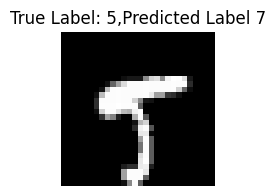

In [137]:
i=np.random.choice(misclassified_images_idx)
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
plt.imshow(x_test[i], cmap='gray')
plt.title(f"True Label: {y_test[i]},Predicted Label {y_pred[i]}")
plt.gca().axis('off')
plt.show()
